# Log returns plots

In [41]:
import pandas as pd
import numpy as np
import math
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [23]:
short_window = 21
long_window = 84

with open("Kraken_BTCUSD.pkl", "rb") as file:
    btc_kraken = pkl.load(file)
with open("Kraken_ETHUSD.pkl", "rb") as file:
    eth_kraken = pkl.load(file)

In [51]:
def plot_signal(log_returns):
    signal = log_returns["log_returns"].rolling(window=short_window).mean() - log_returns["log_returns"].rolling(window=long_window).mean()
    signal = signal[long_window:]
    plt.plot(log_returns["log_returns"].rolling(window=short_window).mean()[long_window:])
    plt.plot(log_returns["log_returns"].rolling(window=long_window).mean())
    signal[signal<=0] = 0
    return signal

In [62]:
def calc_performance(signal, returns):
    returns = returns[long_window:]
    daily_returns = returns*np.sign(signal)+1
    return daily_returns.cumprod()

calc_performance(signal, btc_kraken["close"].pct_change())
#btc_kraken["close"].to_csv("test.csv")

date
2019-11-29     1.000000
2019-11-30     1.000000
2019-12-01     1.000000
2019-12-02     1.000000
2019-12-03     1.000000
                ...    
2021-08-21    16.910206
2021-08-22    17.058388
2021-08-23    17.135801
2021-08-24    16.515701
2021-08-25    16.888958
Length: 636, dtype: float64

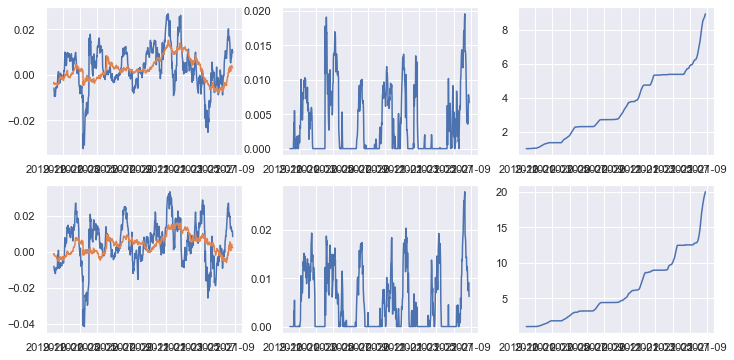

In [56]:
f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(2, 3)

ax = f.add_subplot(gs[0, 0])
btc_signal = plot_signal(btc_kraken)

ax = f.add_subplot(gs[1, 0])
eth_signal = plot_signal(eth_kraken)

ax = f.add_subplot(gs[0, 1])
plt.plot(btc_signal)

ax = f.add_subplot(gs[1, 1])
plt.plot(eth_signal)

ax = f.add_subplot(gs[0, 2])
plt.plot((btc_signal+1).shift().cumprod())

ax = f.add_subplot(gs[1, 2])
plt.plot((eth_signal+1).shift().cumprod())